In [52]:
!pip install kaggle

In [53]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [56]:
!ls

 20190426_101602.jpg   face-mask-dataset.zip  'images (2).jpg'	 kaggle.json
 data		      'images (1).jpg'	       images.jpg	 sample_data


In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [58]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_293.jpg', 'with_mask_1339.jpg', 'with_mask_2786.jpg', 'with_mask_1745.jpg', 'with_mask_2318.jpg']
['with_mask_761.jpg', 'with_mask_2721.jpg', 'with_mask_183.jpg', 'with_mask_3187.jpg', 'with_mask_1763.jpg']


In [59]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_892.jpg', 'without_mask_2441.jpg', 'without_mask_1025.jpg', 'without_mask_2601.jpg', 'without_mask_773.jpg']
['without_mask_246.jpg', 'without_mask_2647.jpg', 'without_mask_1645.jpg', 'without_mask_2816.jpg', 'without_mask_2147.jpg']


In [60]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [61]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [62]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [63]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [64]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


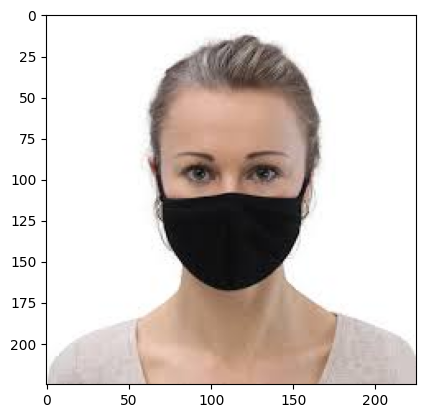

In [65]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2786.jpg')
imgplot = plt.imshow(img)
plt.show()

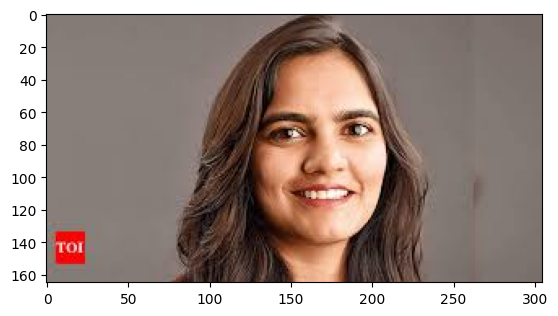

In [66]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1645.jpg')
imgplot = plt.imshow(img)
plt.show()

In [67]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [68]:
type(data)

list

In [69]:
len(data)

7553

array([[[190, 170, 169],
        [190, 169, 168],
        [192, 167, 167],
        ...,
        [124,  81,  75],
        [125,  84,  78],
        [115,  75,  68]],

       [[191, 171, 171],
        [192, 171, 171],
        [190, 166, 167],
        ...,
        [110,  66,  59],
        [125,  81,  74],
        [125,  81,  74]],

       [[187, 165, 167],
        [184, 162, 164],
        [183, 159, 163],
        ...,
        [107,  62,  56],
        [117,  71,  66],
        [126,  81,  75]],

       ...,

       [[140,  27,  31],
        [140,  24,  30],
        [141,  24,  30],
        ...,
        [ 47,  11,   2],
        [ 49,  15,   5],
        [ 52,  16,   7]],

       [[141,  28,  32],
        [142,  25,  31],
        [142,  25,  30],
        ...,
        [ 53,  15,   6],
        [ 55,  18,   9],
        [ 61,  24,  15]],

       [[138,  24,  28],
        [140,  25,  30],
        [140,  24,  28],
        ...,
        [ 58,  19,  10],
        [ 55,  18,   8],
        [ 61,  23,  14]]], dtype=uint8)
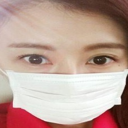

In [70]:
data[0]

In [71]:
type(data[0])

numpy.ndarray

In [72]:
data[0].shape

(128, 128, 3)

In [73]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [74]:
type(X)

numpy.ndarray

In [75]:
type(Y)

numpy.ndarray

In [76]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [77]:
print(Y)

[1 1 1 ... 0 0 0]


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [79]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [82]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[226, 237, 222],
        [210, 226, 213],
        [209, 227, 220],
        ...,
        [243, 242, 244],
        [238, 243, 245],
        [230, 238, 241]],

       [[215, 230, 214],
        [226, 240, 226],
        [220, 233, 224],
        ...,
        [235, 244, 237],
        [232, 242, 240],
        [226, 236, 239]],

       [[216, 233, 217],
        [222, 236, 220],
        [219, 228, 212],
        ...,
        [227, 243, 233],
        [222, 238, 230],
        [219, 235, 228]],

       ...,

       [[ 97,  58,  56],
        [ 99,  60,  62],
        [ 89,  43,  43],
        ...,
        [202, 144, 124],
        [215, 157, 135],
        [208, 151, 125]],

       [[ 93,  28,  15],
        [109,  53,  51],
        [126,  59,  57],
        ...,
        [204, 143, 122],
        [203, 147, 124],
        [192, 141, 114]],

       [[119,  58,  35],
        [136,  86,  78],
        [155,  92,  86],
        ...,
        [221, 160, 136],
        [204, 149, 124],
        [194, 144, 115]]], dtype=uint8)
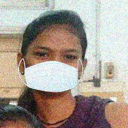

In [83]:
X_train[0]

In [84]:
X_train_scaled[0]

array([[[0.88627451, 0.92941176, 0.87058824],
        [0.82352941, 0.88627451, 0.83529412],
        [0.81960784, 0.89019608, 0.8627451 ],
        ...,
        [0.95294118, 0.94901961, 0.95686275],
        [0.93333333, 0.95294118, 0.96078431],
        [0.90196078, 0.93333333, 0.94509804]],

       [[0.84313725, 0.90196078, 0.83921569],
        [0.88627451, 0.94117647, 0.88627451],
        [0.8627451 , 0.91372549, 0.87843137],
        ...,
        [0.92156863, 0.95686275, 0.92941176],
        [0.90980392, 0.94901961, 0.94117647],
        [0.88627451, 0.9254902 , 0.9372549 ]],

       [[0.84705882, 0.91372549, 0.85098039],
        [0.87058824, 0.9254902 , 0.8627451 ],
        [0.85882353, 0.89411765, 0.83137255],
        ...,
        [0.89019608, 0.95294118, 0.91372549],
        [0.87058824, 0.93333333, 0.90196078],
        [0.85882353, 0.92156863, 0.89411765]],

       ...,

       [[0.38039216, 0.22745098, 0.21960784],
        [0.38823529, 0.23529412, 0.24313725],
        [0.34901961, 0

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [87]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [88]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 6s 21ms/step - loss: 0.4521 - acc: 0.8030 - val_loss: 0.2661 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2999 - acc: 0.8814 - val_loss: 0.3061 - val_acc: 0.8512
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2556 - acc: 0.9025 - val_loss: 0.2295 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2142 - acc: 0.9141 - val_loss: 0.2318 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1768 - acc: 0.9292 - val_loss: 0.2657 - val_acc: 0.8893


In [89]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2454 - acc: 0.9100
Test Accuracy = 0.9099934101104736


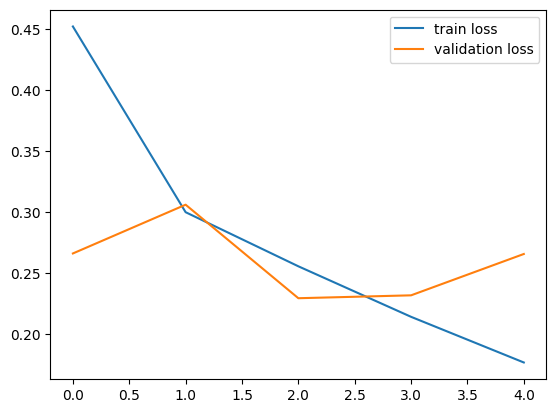

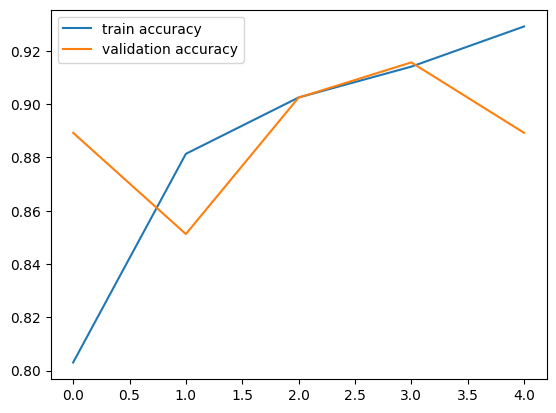

In [90]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/images (2).jpg


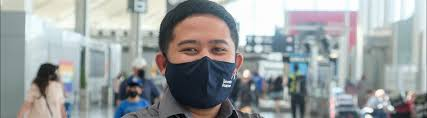

1/1 [==============================] - 0s 83ms/step
[[0.51952523 0.57752895]]
1
The person in the image is wearing a mask


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')